<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_2D_ODEs_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Higher Order ODEs

## Last Time: Dealing with simultaneous ODEs

Last time, we looked at how to solve simultaneous first order ODEs.  The general form of a first-order, two-dimensional differential equation looks like this:

$\frac{dx}{dt}= f_x\left(x,y,t\right)$

$\frac{dy}{dt}= f_y\left(x,y,t\right)$

Note that $f_x$ and $f_y$ are functions of $x, y,$ and $t$. Also note that both derivatives are with respect to $t$ only.  

Numerically solving these equations isn't that much harder than solving single ODEs (if you're rusty on that, go back two classes).  There are two main differences to the code you write:

1.  Your function ```f``` is a bit more complicated.  You need to take as an input an $m$-dimensional array of values (where $m$ is the number of ODEs you have) and you need to return an $m$ dimensional array of values. 

2.  You need to setup your code so that you are storing each of your values for your variables at each step.  The cleanest/most extendable way to do this is to replace your $N$ dimensional array in our previous examples (where $N$ is the number of timesteps you are going to need) with an $N x m$ dimensional array.  

3.  You need to have initial conditions that correspond to the initial value of each of your $m$ coordinates.

It's easiest to see how this works with an example, so here's the activity we did last class:

### Previous Activity:

Here's the activity we did last class to highlight how we can 
code this:

Modify either your code or the solutions from last time to solve the simultaneous differential equations:

$\frac{dx}{dt} = x \cdot y -x$

$\frac{dy}{dt} = y - xy + \sin^2\omega t$

from $t = 0$ to $t = 10$ with initial conditions $x=y=1$ at time $t=0$ and $\omega = 1$.  Plot the results of $x$ vs $t$ and $y$ vs $t$.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep. 

<font color='red'>Note the the initial conditions are now a 2D array.  This is to make it consistent with our definition below of the rpoints array.</font>

In [54]:
start =  0.0
end   = 10.0
r_0   =  np.array([1.0,1.0])
t_0   =  0.0
omega =  1.0
h     =  0.01

Define our function f(r,t).  <font color='red'>Note the change from our previous code.  We are taking in a 2D array $r$, calculating our $f_x$ and $f_y$ functions, and then returning the results of both of these as an array.</font>

In [55]:
def f(r,t):
  x = r[0]
  y = r[1]
  fx = x*y - x
  fy = y - x*y + np.sin(omega*t)**2
  return np.array([fx,fy])

Main loop of our code.  Setup our arrays for position and time, loop over each timestep to perform the 4th order RK algorithm.
<font color='red'>Note the change from our previous code.  We modify the rpoints variable to be an $N x 2$ array since we will have $N$ timesteps and at each one 2 coordinates.  After that, we can use python's vector calculations for implementing the fourth order RK algorithm without any changes.  Also, note when plotting the results at the end that you need to be careful that you know which columns of your rpoints array correspond to x and y coordinates.</font>

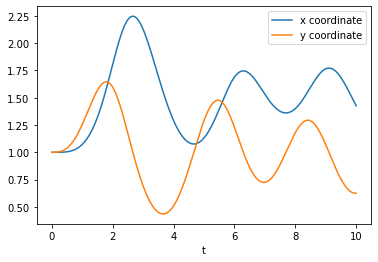

In [56]:
N = int((end-start)/h) +1 #determine how timesteps we need
rpoints = np.zeros((N,2)) #define an array for r values.  Initially set everything to 0.
tpoints = np.zeros(N) #define an array for time values.  Initially set everything to 0.
rpoints[0] = r_0 #set initial condition 
tpoints[0] = t_0 #set initial condition 
for n in range(N-1): #4th order RK method
  tpoints[n+1] = h * (n+1)
  r = rpoints[n]
  t = tpoints[n]
  k_1 = h*f(r,t)
  k_2 = h*f(r+ 0.5 *k_1,t+0.5*h)
  k_3 = h*f(r+ 0.5 *k_2,t+0.5*h)
  k_4 = h*f(r+ k_3, t+h)
  rpoints[n+1] = r + (k_1+2*k_2+2*k_3+k_4)/6
  
plt.plot(tpoints,rpoints[:,0],label='x coordinate')
plt.plot(tpoints,rpoints[:,1],label='y coordinate')
plt.xlabel('t')
plt.legend()
plt.show()

## Today: Higher order ODEs

Although first order ODEs come up in physics, it’s much more likely that you'll encounter higher order ODEs.  In fact, you've already seen and dealt with second order ODE's.  Consider the equation for the oscillation of a mass on a spring:

$F = -kx = m \frac{d^2 x}{dt^2}$

In general, a second-order ODE in 1D will take the form:

$\frac{d^2 x}{dt^2} = f\left(x,\frac{dx}{dt},t\right)$

That is, the acceleration (if we are dealing with a quantity that changes in time) will be some function of the position, velocity, and time.  For example, a mass on an oscillator that is also experiencing a drag force of $-\gamma \cdot v$, where $v$ is the velocity, would have the form:

$\frac{d^2 x}{dt^2} = -\frac{k}{m} x -\frac{\gamma}{m} \frac{dx}{dt}$

This looks like it would be more complicated to solve than what we've done previously, but it turns out to be equivalent to what we did last time with simultaneous differential equations.  The trick is to define a variable for the first derivative (we'll call it $v$ for velocity) as:

$\frac{dx}{dt}= v$

We can then rewrite the above second order ODE as two first order equations:

$\frac{dv}{dt} = f_v\left(x,v,t\right)$

$\frac{dx}{dt} = f_x\left(x,v,t\right)$

For example, for our dampened oscillator above the second order ODE becomes the two first order ODEs:

$\frac{dv}{dt} = -\frac{k}{m} x -\frac{\gamma}{m} v$

$\frac{dx}{dt}= v$

Now that you have these two equations, you can apply the same setup we used last class to solving 2D first-order ODEs.  

**Caveat** Last class, we said it's easiest to keep all of your points in an array such as ```rpoints``` which has size $Nxm$ with $N$ the number of timesteps and $m$ the number of dimensions.  This is still the easiest way to code this problem.  However, you have to be careful: now your array will have one column that is a position ($x$) and one that is a velocity ($v$).  Be sure to make a comment so that you know which column is which!

## Activity

Here we're going to modify our code from last class to study a dampened oscillator.  To do that, take the following steps:

1.  Write a python function ```f(r,t)``` which takes as an input $r$, which is a 2D array of the position $x$ and the velocity $v$, and the time $t$.  Have this function calculate the two quantitates $f_x$ and $f_v$ that correspond to:

>$f_v = -\frac{k}{m} x -\frac{\gamma}{m} v$

>$f_x= v$

>It should return a 2D array like ```np.array([f_x,f_v])```

2.  Modify our code from last class to solve this second order ODE.  To do that, you'll need to:
*  Replace the ```f``` function from our last class with this function.  
*  Change your user defined variables to have places for the initial velocity, initial position, drag coefficient $\gamma$, mass $m$, and spring constant $k$.

3.  Use this code to calculate the position and velocity of a 1 kg mass attached to a spring from a time of $t = 0s$ to $t = 10s$.  Use an initial position of $x_0 = 1.0 m$ and an initial velocity of $y_0 = -1.0 \frac{m}{s}$.  Take a spring constant of $k = 5.0 \frac{N}{m}$ and a frictional coefficient of $\gamma = 0.1 \frac{kg \cdot m}{s}$.

4.  Change your code so that you increase the friction to $\gamma = 1.0 \frac{kg \cdot m}{s}$ and $\gamma = 10.0 \frac{kg \cdot m}{s}$.  Describe the differences you see in the results of the position and velocity as a function of time.

5.  If you have time: think about how you would modify your code to have a driven oscillator (one that has energy added to it as a function of time): 

$\frac{d^2 x}{dt^2} = -\frac{k}{m} x -\frac{\gamma}{m} \frac{dx}{dt} + C \cos \Omega t$

Try to modify your code with a value of $C = 1.0 N$ and a frequency $\Omega$ of your choice.  Try modifying the frequency.  Can you get resonance in your system?


In [57]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep. 


In [58]:
start =  0.0
end   = 10.0
r_0   =  np.array([1.0,-1.0]) #m, m/s
gamma =  1.0 #kg m/s
m     =  1.0 #kg
k     =  5.0 #N/m 
t_0   =  0.0 #s
h     =  0.01 #s
C     = 10.0 #N, for driven system
omega =  3.0#Hz, for driven system

Define our function f(r,v,t).  

In [59]:
def f(r,t):
  x = r[0]
  v = r[1]
  fx = v
  fv = -k / m * x - gamma / m * v
  fv += C * np.cos(omega * t) #for driven system
  return np.array([fx,fv])

Main loop of our code.  Setup our arrays for position and time, loop over each timestep to perform the 4th order RK algorithm.  

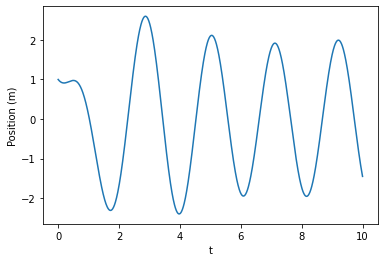

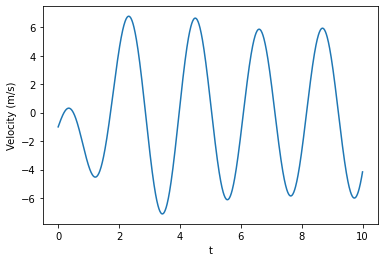

In [60]:
N = int((end-start)/h) +1 #determine how many points I need. I'm adding 1 to make sure I get both the start and end times
rpoints = np.zeros((N,2)) #define an array for my r values.  Initially set everything to 0.  Column 0 is the position, column 1 is the velocity
tpoints = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
rpoints[0] = r_0 #set our initial condition 
tpoints[0] = t_0 #set our initial condition 
for n in range(N-1):
  tpoints[n+1] = h * (n+1)
  r = rpoints[n]
  t = tpoints[n]
  k_1 = h*f(r,t)
  k_2 = h*f(r+ 0.5 *k_1, t+0.5*h)
  k_3 = h*f(r+ 0.5 *k_2, t+0.5*h)
  k_4 = h*f(r+ k_3, t+h)
  rpoints[n+1] = r + (k_1+2*k_2+2*k_3+k_4)/6
plt.plot(tpoints,rpoints[:,0])
plt.xlabel('t')
plt.ylabel('Position (m)')
plt.show()

plt.plot(tpoints,rpoints[:,1])
plt.xlabel('t')
plt.ylabel('Velocity (m/s)')
plt.show()